In [12]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [13]:
import numpy as np
import pandas as pd

In [14]:
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [15]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, inspect

In [16]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [17]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [18]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [19]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [22]:
# Create our session (link) from Python to the DB
session = Session(engine)
inspector = inspect(engine)

In [26]:
columns = inspector.get_columns('Measurement')
for column in columns:
    print(column["name"], column["type"])

id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT


In [27]:
columns = inspector.get_columns('Station')
for column in columns:
    print(column["name"], column["type"])

id INTEGER
station TEXT
name TEXT
latitude FLOAT
longitude FLOAT
elevation FLOAT


# Exploratory Climate Analysis

station: USC00519397, date: 2017-08-23, precip: 0.0
2016-08-23


(0, 6.7)

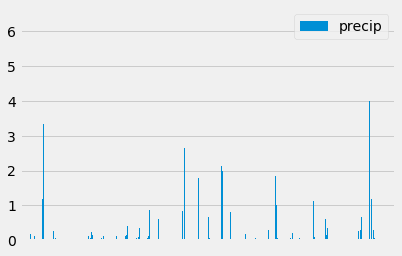

In [291]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results


precipitation = session.query(Measurement).order_by(Measurement.date.desc()).limit(1).all()

for precip in precipitation:
    print("station: {0}, date: {1}, precip: {2}".format(precip.station , precip.date , precip.prcp))
    filter_date = precip.date
    
from datetime import datetime

format_string = "%Y-%m-%d"

datetime_object = datetime.strptime(filter_date, format_string).date()

filter_date = datetime_object.replace(year = datetime_object.year - 1)

print(filter_date)

date_l = []
precip_l = []


precipitation = session.query(Measurement).filter(Measurement.date > filter_date).all()
for precip in precipitation:
    #print("station: {0}, date: {1}, precip: {2}".format(precip.station , precip.date , precip.prcp))
    date_l.append(precip.date)
    precip_l.append(precip.prcp)

    
df_precip = pd.DataFrame({'date': date_l, 'precip': precip_l})   
df_precip = df_precip.sort_values('date')
df_precip = df_precip.fillna(0)
#df_precip = df_precip.groupby(['date']).sum()
df_precip.head(10)

ax = df_precip.plot.bar(y='precip')

ax.axes.get_xaxis().set_ticks([])

plt.ylim((0,max(df_precip['precip'])))




![precipitation](Images/precipitation.png)

In [292]:
df_precip.describe()

,precip
count,2223.000000
mean,0.159951
std,0.441220
min,0.000000
25%,0.000000
50%,0.010000
75%,0.110000
max,6.700000


![describe](Images/describe.png)

In [100]:
# Design a query to show how many stations are available in this dataset?
stations = session.query(Measurement).group_by(Measurement.station).count()
print(stations)

9


In [152]:
# What are the most active stations? (i.e. what stations have the most rows)?
# List the stations and the counts in descending order.
precipitation = session.query(Measurement.station, func.count(Measurement.station).label('ctr')).group_by(Measurement.station).order_by(func.count(Measurement.station).desc()).all()

station = []
count = []

for precip in precipitation:
    print("station: -->{0}<--- - Count: {1}".format(precip.station,precip.ctr))
    station.append(precip.station)
    count.append(precip.ctr)
    #date_l.append(precip.date)
    #precip_l.append(precip.prcp)


station: -->USC00519281<--- - Count: 2772
station: -->USC00519397<--- - Count: 2724
station: -->USC00513117<--- - Count: 2709
station: -->USC00519523<--- - Count: 2669
station: -->USC00516128<--- - Count: 2612
station: -->USC00514830<--- - Count: 2202
station: -->USC00511918<--- - Count: 1979
station: -->USC00517948<--- - Count: 1372
station: -->USC00518838<--- - Count: 511


In [168]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature most active station?
print (station[0])
precipitation = session.query(Measurement.station, func.min(Measurement.tobs).label('mint')).group_by(Measurement.station).all()
for precip in precipitation:
    #print("station: {0} - Count: {1}".format(precip.station,precip.mint))
    if (precip.station==station[0]): min_t = precip.mint

precipitation = session.query(Measurement.station, func.max(Measurement.tobs).label('maxt')).group_by(Measurement.station).all()
for precip in precipitation:
    #print("station: {0} - Count: {1}".format(precip.station,precip.maxt))
    if (precip.station==station[0]): max_t = precip.maxt

precipitation = session.query(Measurement.station, func.avg(Measurement.tobs).label('avgt')).group_by(Measurement.station).all()
for precip in precipitation:
    #print("station: {0} - Count: {1}".format(precip.station,precip.maxt))
    if (precip.station==station[0]): avg_t = precip.avgt
        
        
        
print (f"station:{station[0]} min:{min_t} - max:{max_t} - avg:{round(avg_t,2)}")

USC00519281
station:USC00519281 min:54.0 - max:85.0 - avg:71.66


2016-08-18


Text(0, 0.5, 'Frequency')

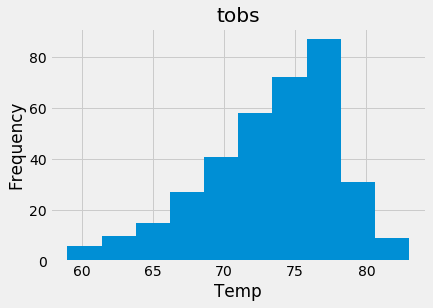

In [178]:
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram

precipitation = session.query(Measurement).order_by(Measurement.date.desc()).filter(Measurement.station==station[0]).limit(1).all()
for precip in precipitation:
    #print("station: {0}, temp: {1}".format(precip.station , precip.tobs))
    filter_date = precip.date

    
from datetime import datetime

format_string = "%Y-%m-%d"

datetime_object = datetime.strptime(filter_date, format_string).date()

filter_date = datetime_object.replace(year = datetime_object.year - 1)

print(filter_date)

tobs_l=[]    
    
precipitation = session.query(Measurement).filter(Measurement.date > filter_date,Measurement.station==station[0]).all()
for precip in precipitation:
    #print("station: {0}, tobs: {1}".format(precip.station , precip.tobs))
    tobs_l.append(precip.tobs)
    
df_precip = pd.DataFrame({'tobs': tobs_l})       

df_precip.head()
df_precip.hist()
plt.xlabel('Temp')
plt.ylabel('Frequency')

![precipitation](Images/station-histogram.png)

In [284]:
# This function called `calc_temps` will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
def calc_temps(start_date, end_date):
    #"""TMIN, TAVG, and TMAX for a list of dates.
    
    #Args:
    #    start_date (string): A date string in the format %Y-%m-%d
    #    end_date (string): A date string in the format %Y-%m-%d
        
    #Returns:
    #    TMIN, TAVE, and TMAX
    #"""
    
    return session.query(func.min(Measurement.tobs).label('mint'), func.avg(Measurement.tobs).label('avgt'), func.max(Measurement.tobs).label('maxt')).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()

# function usage example
#print(calc_temps('2012-02-28', '2012-03-05'))

In [285]:
# Use your previous function `calc_temps` to calculate the tmin, tavg, and tmax 
# for your trip using the previous year's data for those same dates.

myresults = calc_temps('2017-01-01', '2017-03-05')

mint = myresults[0][0]
avgt = myresults[0][1]
maxt = myresults[0][2]


#### Plot the results from your previous query as a bar chart. 
# Use "Trip Avg Temp" as your Title
# Use the average temperature for the y value
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)




([], <a list of 0 Text xticklabel objects>)

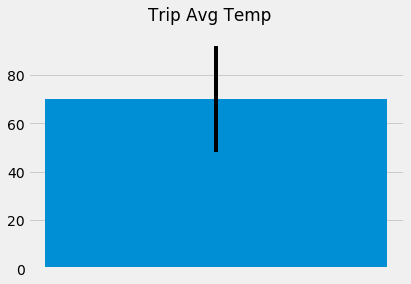

In [286]:
p1 = plt.bar(0, avgt, 1, yerr=maxt-mint)
plt.suptitle('Trip Avg Temp')
plt.xticks([])

In [282]:
# Calculate the total amount of rainfall per weather station for your trip dates using the previous year's matching dates.
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation

start_date = '2017-01-01'
end_date='2017-03-05'



totalrain = session.query(Station.station,Station.name,Station.latitude,Station.longitude,func.sum(Measurement.prcp).label('sumprecip')).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).filter(Station.station==Measurement.station).\
        group_by(Station.station).all()

print (totalrain)




[('USC00513117', 'KANEOHE 838.1, HI US', 21.4234, -157.8015, 13.51), ('USC00514830', 'KUALOA RANCH HEADQUARTERS 886.9, HI US', 21.5213, -157.8374, 7.8500000000000005), ('USC00516128', 'MANOA LYON ARBO 785.2, HI US', 21.3331, -157.8025, 16.770000000000003), ('USC00517948', 'PEARL CITY, HI US', 21.3934, -157.9751, 3.2), ('USC00519281', 'WAIHEE 837.5, HI US', 21.45167, -157.84888999999998, 13.530000000000001), ('USC00519397', 'WAIKIKI 717.2, HI US', 21.2716, -157.8168, 6.829999999999999), ('USC00519523', 'WAIMANALO EXPERIMENTAL FARM, HI US', 21.33556, -157.71139, 10.940000000000001)]


## Optional Challenge Assignment

In [287]:
# Create a query that will calculate the daily normals 
# (i.e. the averages for tmin, tmax, and tavg for all historic data matching a specific month and day)

def daily_normals(date):
    """Daily Normals.
    
    Args:
        date (str): A date string in the format '%m-%d'
        
    Returns:
        A list of tuples containing the daily normals, tmin, tavg, and tmax
    
    """
    
    sel = [func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)]
    return session.query(*sel).filter(func.strftime("%m-%d", Measurement.date) == date).all()
    
daily_normals("01-01")

[(62.0, 69.15384615384616, 77.0)]

In [288]:
# calculate the daily normals for your trip
# push each tuple of calculations into a list called `normals`


startdate = '2017-01-01'
enddate = '2017-03-05'


format_string = "%Y-%m-%d"

datetime_start = datetime.strptime(startdate, format_string).date()
datetime_end = datetime.strptime(enddate, format_string).date()
days = (datetime_end - datetime_start).days
datelist = pd.date_range(startdate, periods=days).tolist()

date_l = []
tmin_l = []
tavg_l = []
tmax_l = []

for date in datelist:
    if (date.day<10):
        dd = f"0{date.day}"
    else:
         dd = f"{date.day}"
            
    if (date.month<10):
        mm = f"0{date.month}"
    else:
         mm = f"{date.month}"
    
    
    monthday = f"{mm}-{dd}"
    print(monthday)
    temps = daily_normals(monthday)
    
    
    
    tmin_add = temps[0][0]
    tavg_add = temps[0][1]
    tmax_add = temps[0][2]
    date_add = f"{date.year}-{monthday}"
    
    date_l.append(date_add)
    tmin_l.append(tmin_add)
    tavg_l.append(tavg_add)
    tmax_l.append(tmax_add)


    print(datecal)
    
#print(datelist) 
# Set the start and end date of the trip

# Use the start and end date to create a range of dates

# Stip off the year and save a list of %m-%d strings

# Loop through the list of %m-%d strings and calculate the normals for each date


01-01
2017-03-04
01-02
2017-03-04
01-03
2017-03-04
01-04
2017-03-04
01-05
2017-03-04
01-06
2017-03-04
01-07
2017-03-04
01-08
2017-03-04
01-09
2017-03-04
01-10
2017-03-04
01-11
2017-03-04
01-12
2017-03-04
01-13
2017-03-04
01-14
2017-03-04
01-15
2017-03-04
01-16
2017-03-04
01-17
2017-03-04
01-18
2017-03-04
01-19
2017-03-04
01-20
2017-03-04
01-21
2017-03-04
01-22
2017-03-04
01-23
2017-03-04
01-24
2017-03-04
01-25
2017-03-04
01-26
2017-03-04
01-27
2017-03-04
01-28
2017-03-04
01-29
2017-03-04
01-30
2017-03-04
01-31
2017-03-04
02-01
2017-03-04
02-02
2017-03-04
02-03
2017-03-04
02-04
2017-03-04
02-05
2017-03-04
02-06
2017-03-04
02-07
2017-03-04
02-08
2017-03-04
02-09
2017-03-04
02-10
2017-03-04
02-11
2017-03-04
02-12
2017-03-04
02-13
2017-03-04
02-14
2017-03-04
02-15
2017-03-04
02-16
2017-03-04
02-17
2017-03-04
02-18
2017-03-04
02-19
2017-03-04
02-20
2017-03-04
02-21
2017-03-04
02-22
2017-03-04
02-23
2017-03-04
02-24
2017-03-04
02-25
2017-03-04
02-26
2017-03-04
02-27
2017-03-04
02-28
2017-03-

In [289]:
# Load the previous query results into a Pandas DataFrame and add the `trip_dates` range as the `date` index
df_stations = pd.DataFrame({'date': date_l,'tmin':tmin_l,'tavg':tavg_l,'tmax':tmax_l})
df_stations = df_stations.set_index('date')
df_stations.head()

,tmin,tavg,tmax
date,,,
2017-01-01,62.0,69.153846,77.0
2017-01-02,60.0,69.396226,77.0
2017-01-03,62.0,68.909091,77.0
2017-01-04,58.0,70.000000,76.0
2017-01-05,56.0,67.964286,76.0


(array([ 0., 10., 20., 30., 40., 50., 60., 70.]),
 <a list of 8 Text xticklabel objects>)

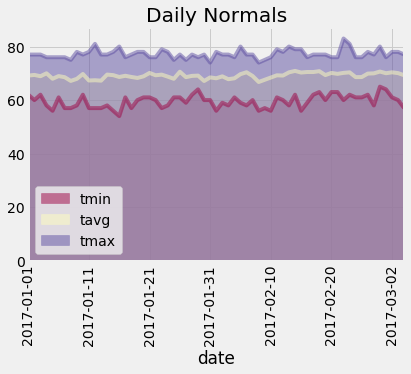

In [290]:
# Plot the daily normals as an area plot with `stacked=False`
df_stations.plot(kind='area', stacked=False, alpha=0.5, colormap='Spectral',
        title='Daily Normals')
plt.xticks(rotation=90)